<a href="https://colab.research.google.com/github/tlkt/mofan_work/blob/master/401_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from torch.autograd import Variable
import os

In [0]:
EPOCH=1
BATCH_SIZE=50
LR=0.001
DOWNLOAD_MNIST = False

In [0]:
if not(os.path.exists('./mnist')) or not os.listdir('./mnist'):
  DOWNLOAD_MNIST = True

In [0]:
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download = DOWNLOAD_MNIST
)

In [34]:
print(train_data.train_data.size())

torch.Size([60000, 28, 28])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


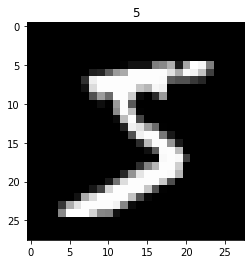

In [35]:
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.title('%i' %train_data.train_labels[0])
plt.show()

In [0]:
train_loader = Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)


In [0]:
test_data = torchvision.datasets.MNIST(root='./mnist',train=False)

In [38]:
test_x = torch.unsqueeze(test_data.test_data,dim=1).type(torch.FloatTensor)[:2000]/255

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [39]:
test_y = test_data.test_labels[:2000]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.Conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels = 1,
            out_channels = 16,
            kernel_size=5,
            stride = 1,
            padding = 2,
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.Conv2 = nn.Sequential(
        nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=5,
            stride=1,
            padding=2
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.out = nn.Linear(32*7*7,10)

  def forward(self,x):
    x = self.Conv1(x)
    x = self.Conv2(x)
    x = x.view(x.size(0),-1)
    out = self.out(x)
    return out,x

In [60]:
cnn = CNN()
cnn

CNN(
  (Conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [0]:
optimizer = torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func = nn.CrossEntropyLoss()

In [0]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)


In [0]:
plt.ion()

In [65]:
for epoch in range(EPOCH):
  for step,(b_x,b_y) in enumerate(train_loader):
      output = cnn(b_x)[0]
      loss = loss_func(output,b_y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if step % 50 == 0:
        test_output, last_layer = cnn(test_x)
        pred_y = torch.max(test_output, 1)[1].data.numpy()
        accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

plt.ioff()

Epoch:  0 | train loss: 2.3180 | test accuracy: 0.16
Epoch:  0 | train loss: 0.5207 | test accuracy: 0.82
Epoch:  0 | train loss: 0.2111 | test accuracy: 0.86
Epoch:  0 | train loss: 0.3248 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3939 | test accuracy: 0.93
Epoch:  0 | train loss: 0.3312 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1373 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0507 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0753 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1605 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1427 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1044 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1104 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2011 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1286 | test accuracy: 0.98
Epoch:  0 | train loss: 0.1225 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0518 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0898 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1067 | test accuracy

In [66]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
